# matplotlib.colors

matplotlib.colors模块用于将数字或颜色参数转换成RGB或RGBA。

RGB和RGBA分别是3或4个浮点数的序列，取值范围[0,1].

colormap指1维颜色数组。

颜色映射通常有两步：首先使用Normalize或其子类的实例将数据数组归一化，即映射成[0,1]范围数组；然后使用Colormap子类的实例将[0,1]范围内数字映射成颜色，包括LinearSegmentedColormap和ListedColormap两类。

is_color_like()：检查对象是否可以解释成颜色

to_rgba()：转换一个对象维RGBA元组

to_hex():转换对象为HTML风格的hex字符串#rrggbb格式

to_rgba_array():颜色序列转为(n, 4)的RGBA数组。

## 颜色参数格式

* 内置颜色（单字母表示）

 * b: blue
 * g: green
 * r: red
 * ...
 
* html hex string
 
  例如： #eeefff
  
* RGB、RGBA

 （r, g, b）或 (r, g, b, a)元组，其中r,g,b,a取值范围为[0,1]
 
* html颜色名称

 例如'red','burlywood'等

## Step 1: Normalize

### class matplot.colors.Normalize(vmin=None, vmax=None, clip=False)

用于归一化数据到[0.0, 1.0]区间的类。

个人理解Normalize是一个归一化器，Normalize实例化返回一个对象实例，传递数据给这个实例进行归一化。如果vmin或vmax没指定，他们初始化于第一个处理输入的最小、最大值。clip参数为True时，给定值在范围外，返回值为0或1，看更接近谁。如果vmin == vmax，返回0。

In [4]:
%matplotlib inline
from matplotlib.colors import Normalize
#指定vmin,vmax，那么vmin归一化就是 0，vmax归一化是1
norm1 = Normalize(vmin=-10,vmax=10)
print norm1([-10, -5, 0, 5, 10])

#不指定vmin，vmax，根据第一组处理数据确定vmin和vmax
norm2 = Normalize()
# vmin=-2, vmax=2
print norm2([-2, -1, 0, 1, 2])
# as input data processed above, vmin=-2, vmax=2
print norm2([-3, -2, -1, 0, 1, 2, 3])

norm3 = Normalize(clip=True)
print norm2([-2, -1, 0, 1, 2])
print norm2([-3, -2, -1, 0, 1, 2, 3])

[ 0.    0.25  0.5   0.75  1.  ]
[ 0.    0.25  0.5   0.75  1.  ]
[-0.25  0.    0.25  0.5   0.75  1.    1.25]
[ 0.    0.25  0.5   0.75  1.  ]
[-0.25  0.    0.25  0.5   0.75  1.    1.25]


### matplotlib.colors.LogNorm(vmin=None, vmax=None, clip=False)

用于归一化数据到[0,1]范围，但以log对数尺度。

In [5]:
from matplotlib.colors import LogNorm

norm1 = LogNorm()
print norm1([1, 2, 4, 8, 16])

[0.0 0.25 0.5 0.75 1.0]


### class matplotlib.colors.BoundaryNorm(boundaries, ncolors, clip=False)

基于离散区间产生colormap索引。

不同于Normalize或LogNorm，BoundaryNorm映射值到整数，而不是[0,1]区间。

映射到[0,1]区间可以通过分段线性插值完成，但使用整数更简单。

 * boundaries 单调递增序列
 * ncolors colormap使用的颜色数目
 
如果 `b[i] <= v < b[i+1]`，v被映射到颜色j，其中i从0到len(boundaries)-2，j从0到ncolors-1。

超出范围的值低映射到-1，高值映射到ncolors。

In [7]:
from matplotlib.colors import BoundaryNorm

bounds = [-1, -0.5, 0, 0.5, 1]
norm1 = BoundaryNorm(boundaries=bounds, ncolors=len(bounds))
print norm1

### class matplotlib.colors.NoNorm(vmin=None, vmax=None, clip=Fasle)

Normalize的假替换，实际没做归一化，用于直接使用ScalarMappable索引。

In [8]:
from matplotlib.colors import NoNorm

norm = NoNorm()
print norm([-1, -0.5, 0, 0,5, 1])

[-1, -0.5, 0, 0, 5, 1]


### class matplotlib.colors.PowerNorm(gamma, vmin=None, vmax=None, clip=False)

幂比例的归一化。

### class matplotlib.colors.SymLogNorm(linthresh, linscale=1.0, vmin=None, vmax=None, clip=False)

## Step 2：Mapping to color

### class matplotlib.colors.Colormap(name, N=256)

所有标量到RGBA映射的基类。

一般Colormap实例用于将[0,1]区间数据（浮点数）转换为各个Colormap表示的RGBA值。缩放数据到[0,1]区间查阅matplotlib.colors.Normalize。值得注意的是，matplotlib.cm.ScalarMappable子类严重依赖于`data->normalize->map-to-color`处理链。

### class matplotlib.colors.LinearSegmentedColormap(name, segmentdata, N=256, gamma=1.0)

基于使用线性分段的查询表的colormap对象。

查询表使用对每个主要颜色线性插值产生，[0,1]域划分为任意数的分段。

从线性映射分段中创建颜色映射

segmentdata参数是包含'red','green','blue'条目的字典。每个条目是元组(x,y0,y1)的列表。alpha条目是可选的。

例如

```
cdict = {'red':   [(0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'blue':  [(0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)]}
```

#### static from_list(name, colors, N=256, gamma=1.0)

LinearSegmentedColormap.from_list()静态方法用于产生平滑变化的LinearSegmentedColormap。

通过colors序列生成线性分段colormap，从val=0时colors[0]到val=1的colors[-1]均匀过渡。N是rgb量化等级数（个人理解是colorbar分成多少块bins，每个bin颜色一致，bins越多颜色越精细）。另一种方法，(value,color)元组构成的列表给定用来非均匀的划分范围。

一般，我们常用from_list方法。

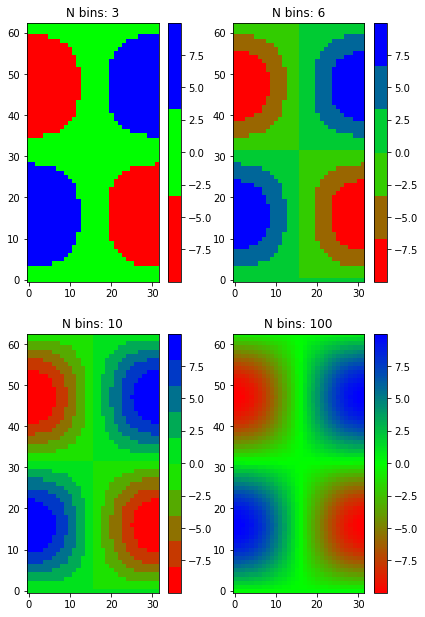

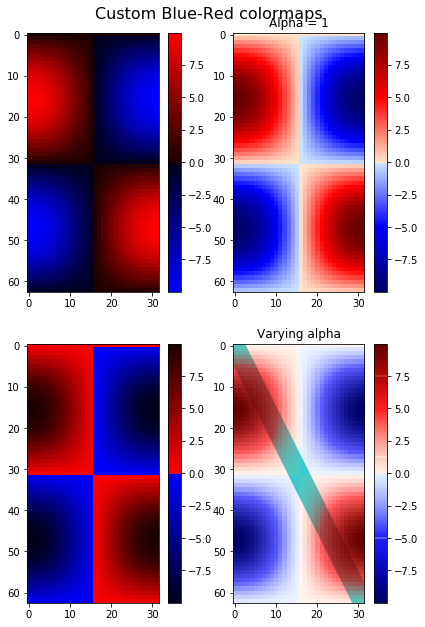

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

"""
Creating a colormap from a list of colors
-----------------------------------------
Creating a colormap from a list of colors can be done with the `from_list`
method of `LinearSegmentedColormap`. You must pass a list of RGB tuples that
define the mixture of colors from 0 to 1.


Creating custom colormaps
-------------------------
It is also possible to create a custom mapping for a colormap. This is
accomplished by creating dictionary that specifies how the RGB channels
change from one end of the cmap to the other.

Example: suppose you want red to increase from 0 to 1 over the bottom
half, green to do the same over the middle half, and blue over the top
half.  Then you would use:

cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0))}

If, as in this example, there are no discontinuities in the r, g, and b
components, then it is quite simple: the second and third element of
each tuple, above, is the same--call it "y".  The first element ("x")
defines interpolation intervals over the full range of 0 to 1, and it
must span that whole range.  In other words, the values of x divide the
0-to-1 range into a set of segments, and y gives the end-point color
values for each segment.

Now consider the green. cdict['green'] is saying that for
0 <= x <= 0.25, y is zero; no green.
0.25 < x <= 0.75, y varies linearly from 0 to 1.
x > 0.75, y remains at 1, full green.

If there are discontinuities, then it is a little more complicated.
Label the 3 elements in each row in the cdict entry for a given color as
(x, y0, y1).  Then for values of x between x[i] and x[i+1] the color
value is interpolated between y1[i] and y0[i+1].

Going back to the cookbook example, look at cdict['red']; because y0 !=
y1, it is saying that for x from 0 to 0.5, red increases from 0 to 1,
but then it jumps down, so that for x from 0.5 to 1, red increases from
0.7 to 1.  Green ramps from 0 to 1 as x goes from 0 to 0.5, then jumps
back to 0, and ramps back to 1 as x goes from 0.5 to 1.

row i:   x  y0  y1
                /
               /
row i+1: x  y0  y1

Above is an attempt to show that for x in the range x[i] to x[i+1], the
interpolation is between y1[i] and y0[i+1].  So, y0[0] and y1[-1] are
never used.

"""
# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10


# --- Colormaps from a list ---

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B ,equal to ['r','g','b']
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)


# --- Custom colormaps ---

cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 1.0),
                   (1.0, 0.1, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.1),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict3 = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

# Make a modified version of cdict3 with some transparency
# in the middle of the range.
cdict4 = cdict3.copy()
cdict4['alpha'] = ((0.0, 1.0, 1.0),
                #   (0.25,1.0, 1.0),
                   (0.5, 0.3, 0.3),
                #   (0.75,1.0, 1.0),
                   (1.0, 1.0, 1.0))


# Now we will use this example to illustrate 3 ways of
# handling custom colormaps.
# First, the most direct and explicit:

blue_red1 = LinearSegmentedColormap('BlueRed1', cdict1)

# Second, create the map explicitly and register it.
# Like the first method, this method works with any kind
# of Colormap, not just
# a LinearSegmentedColormap:

blue_red2 = LinearSegmentedColormap('BlueRed2', cdict2)
plt.register_cmap(cmap=blue_red2)

# Third, for LinearSegmentedColormap only,
# leave everything to register_cmap:

plt.register_cmap(name='BlueRed3', data=cdict3)  # optional lut kwarg
plt.register_cmap(name='BlueRedAlpha', data=cdict4)

# Make the figure:

fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Make 4 subplots:

im1 = axs[0, 0].imshow(Z, interpolation='nearest', cmap=blue_red1)
fig.colorbar(im1, ax=axs[0, 0])

cmap = plt.get_cmap('BlueRed2')
im2 = axs[1, 0].imshow(Z, interpolation='nearest', cmap=cmap)
fig.colorbar(im2, ax=axs[1, 0])

# Now we will set the third cmap as the default.  One would
# not normally do this in the middle of a script like this;
# it is done here just to illustrate the method.

plt.rcParams['image.cmap'] = 'BlueRed3'

im3 = axs[0, 1].imshow(Z, interpolation='nearest')
fig.colorbar(im3, ax=axs[0, 1])
axs[0, 1].set_title("Alpha = 1")

# Or as yet another variation, we can replace the rcParams
# specification *before* the imshow with the following *after*
# imshow.
# This sets the new default *and* sets the colormap of the last
# image-like item plotted via pyplot, if any.
#

# Draw a line with low zorder so it will be behind the image.
axs[1, 1].plot([0, 10*np.pi], [0, 20*np.pi], color='c', lw=20, zorder=-1)

im4 = axs[1, 1].imshow(Z, interpolation='nearest')
fig.colorbar(im4, ax=axs[1, 1])

# Here it is: changing the colormap for the current image and its
# colorbar after they have been plotted.
im4.set_cmap('BlueRedAlpha')
axs[1, 1].set_title("Varying alpha")
#

fig.suptitle('Custom Blue-Red colormaps', fontsize=16)

plt.show()

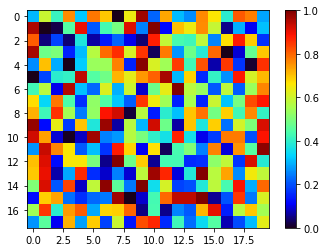

In [9]:
#修改内置colormap满足定制要求
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
jetcmap = cm.get_cmap("jet", 10) #generate a jet map with 10 values
jet_vals = jetcmap(np.arange(10)) #extract those values as an array
jet_vals[0] = [0.1, 0, 0.1, 1] #change the first value for example
newcmap = mpl.colors.LinearSegmentedColormap.from_list("newjet", jet_vals)
plt.imshow(np.random.rand(18,20), cmap=newcmap, vmin=0, vmax=1, interpolation="nearest")
plt.colorbar()

### class matplotlib.colors.ListedColormap(colors, name='from_list', N=None)

用于从colors列表产生colormap对象。

常用于索引直接映射colormap，不过也可以用于普通映射产生特殊colormap。

感觉和上面的LinearSegmentedColormap.from_list()功能相同。

 * colors ： matplotlib颜色说明的列表，或等价的Nx3或Nx4浮点数组（N rgb或rgba值）
 * name   : colormap名称，字符串
 * N      : 映射中条目数。

## 工具函数

### matplotlib.colors.is_color_like(c)

返回c是否可以被解释为一种RGB(A)颜色。

### matplotlib.colors.to_hex(c, keep_alpha=False)

转换c为hex形式的颜色。

如果keep_alpha为False（缺省），使用#rrggbb格式，否则#rrggbbaa格式。

### matplotlib.colors.to_rgba(c, alpha=None)

转换c为RGBA颜色。

### matplotlib.colors.to_rgba_array(c, alpha=None)

转换c为RGBA颜色的(n,4)数组



---

# matplotlib.cm

内置colormaps、colormap处理工具和ScalarMappable混合类。

### class matplotlib.cm.ScalarMappable(norm=None, cmap=None)

暂不做讨论

### matplotlib.cm.get_cmap(name=None, lut=None)

获得一个colormap实例，如果name是None，缺省是rc值。

register_cmap()注册的colormap优先级高于内置colormaps。

如果name是一个matplotlib.colors.Colormap实例，返回它。

如果lut不是None，必须是一个整数，给定查询表想要的条目数，name必须是标准的mpl colormap名称。

### matplotlib.cm.register_cmap(name=None, cmap=None, data=None, lut=None)

加入一个colormap到get_cmap()能识别的集合中。

两种使用方式：

```
register_cmap(name='swirly', cmap=swirly_cmap)

register_cmap(name='choppy', data=choppydata, lut=128)
```